## World cup 2022 predicions

The task is to predict the winner of the world cup 2022 on the basis of previous world cup results. The data is available in the file `worldcups.csv`, which contains the winners of the previous world cups. In the file `wcmatches.csv` you can find the results of all matches played in the world cups. The data is available from [Kaggle](https://www.kaggle.com/abecklas/fifa-world-cup). You can use some part of the data for training and some part for testing.

Then you can use the trained model to predict the winner of the world cup 2022 on the basis of the results of the matches played in the world cup 2022. The results of the matches can be found in the file `Fifa_world_cup_matches.csv`.

Few ideas for the prediction:

1. (Simple binary classification) Use the results of the matches in the group stage and 1st round of the knockout stage to to predict whether given country is a winner or not. -- disadvantage: the classes are not balanced (there are more losers than winners)

2. Predict each match independently, i.e. as features use the results of the given team in last 3 matches and the results of the opponent in last 3 matches. Then on this basis predict the result of the match. To get the final winner iterate through all matches in the knockout stage and predict the winner of each match.





### Import the data

In [1]:
import pandas as pd

winners = pd.read_csv('worldcups.csv')
winners.head()

,year,host,winner,second,third,fourth,goals_scored,teams,games,attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000
4,1954,Switzerland,West Germany,Hungary,Austria,Uruguay,140,16,26,943000


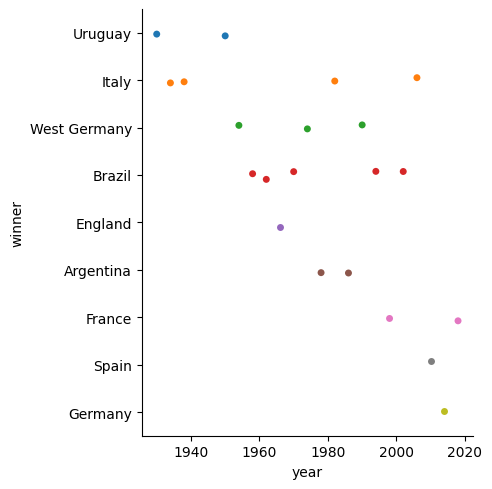

In [4]:
import seaborn as sns
sns.catplot(data = winners, x = 'year', y = 'winner')

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# I save the original data frame in a flag to then train the final pipeline
pipe_DF = winners
# Dummies for categorical columns
final_df = pd.get_dummies(winners)

In [7]:
X = final_df.drop('goals_scored',axis=1)
y = final_df['goals_scored']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [9]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

          70       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       0.0
         145       0.00      0.00      0.00       0.0
         147       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



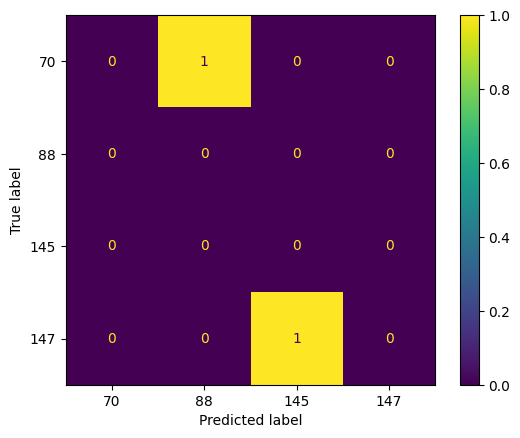

In [10]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

          70       0.00      0.00      0.00       1.0
          89       0.00      0.00      0.00       0.0
         145       0.00      0.00      0.00       0.0
         147       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



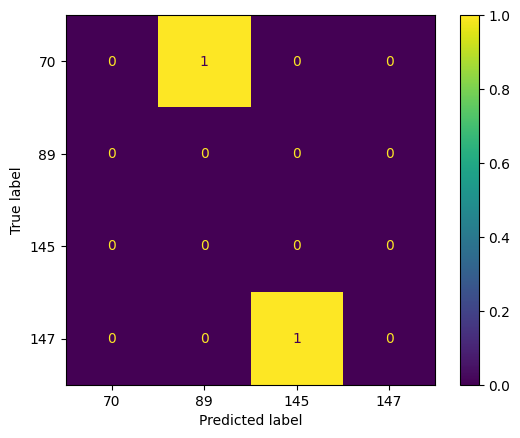

In [11]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

In [13]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

X_train.shape

(18, 71)

In [15]:
matches = pd.read_csv('wcmatches.csv')
matches.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday


In [21]:
df_home = matches[['home_team', 'home_score', 'away_score']]
df_away = matches[['away_team', 'home_score', 'away_score']]

df_home = df_home.rename(columns={'home_team':'Team', 'home_score': 'GoalsScored', 'away_score': 'GoalsConceded'})
df_away = df_away.rename(columns={'away_team':'Team', 'home_score': 'GoalsConceded', 'away_score': 'GoalsScored'})

df_team_strength = pd.concat([df_home, df_away], ignore_index=True).groupby(['Team']).mean()
df_team_strength


,GoalsScored,GoalsConceded
Team,,
Algeria,1.000000,1.461538
Angola,0.333333,0.666667
Argentina,1.691358,1.148148
Australia,0.812500,1.937500
Austria,1.482759,1.620690
...,...,...
Uruguay,1.553571,1.321429
Wales,0.800000,0.800000
West Germany,2.112903,1.241935


In [22]:
import pandas as pd
import pickle
from scipy.stats import poisson

In [23]:
def predict_points(home, away):
    if home in df_team_strength.index and away in df_team_strength.index:
        # goals_scored * goals_conceded
        lamb_home = df_team_strength.at[home,'GoalsScored'] * df_team_strength.at[away,'GoalsConceded']
        lamb_away = df_team_strength.at[away,'GoalsScored'] * df_team_strength.at[home,'GoalsConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11): #number of goals home team
            for y in range(0, 11): #number of goals away team
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)

In [24]:
print(predict_points('England', 'United States'))
print(predict_points('Argentina', 'Mexico'))
print(predict_points('Qatar (H)', 'Ecuador')) # Qatar vs Team X -> 0 points to both


(2.2356147635326007, 0.5922397535606193)
(2.3129151525530505, 0.5378377125059863)
(0, 0)


In [20]:
fifa_rank = matches[['date','home_team', 'away_team', 'home_score', 'away_score']]
home = fifa_rank[['date', 'home_team', 'home_score']].rename(columns={"home_team":"team", "home_score":"rank"})
away = fifa_rank[['date', 'away_team', 'away_score']].rename(columns={"away_team":"team", "away_score":"rank"})
fifa_rank = pd.concat([home, away])
#Select each country latest match
fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
last_rank = fifa_rank
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank', ascending=True)[0:10].reset_index()
fifa_rank_top10

,team,date,rank
0,Zaire,1974-06-22,0
1,Scotland,1998-06-23,0
2,El Salvador,1982-06-23,0
3,England,2018-07-14,0
4,Romania,1998-06-30,0
5,Germany,2018-06-27,0
6,Paraguay,2010-07-03,0
7,Honduras,2014-06-25,0
8,Hungary,1986-06-09,0
9,Norway,1998-06-27,0


In [4]:
matches2k22 = pd.read_csv('Fifa_world_cup_matches.csv')
matches2k22.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361
